# Load Datasets

In [0]:
# packages untuk load dataset
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# mendefinisan variabel packages
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# load dataset
file_list = drive.ListFile({'q':"title='rockpaperscissors.zip'"}).GetList()[0]['id']
rps = drive.CreateFile({'id': file_list})
rps.GetContentFile('rockpaperscissors.zip')

In [4]:
rps.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [5]:
!unzip rockpaperscissors.zip

Archive:  rockpaperscissors.zip
   creating: rockpaperscissors/
   creating: rockpaperscissors/train/
   creating: rockpaperscissors/train/paper/
  inflating: rockpaperscissors/train/paper/04l5I8TqdzF9WDMJ.png  
  inflating: rockpaperscissors/train/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: rockpaperscissors/train/paper/0cb6cVL8pkfi4wF6.png  
  inflating: rockpaperscissors/train/paper/0eqArS2GgsBeqgSn.png  
  inflating: rockpaperscissors/train/paper/0Og76sl5CJhbxWWx.png  
  inflating: rockpaperscissors/train/paper/0RA9rcrv8iVvuDDU.png  
  inflating: rockpaperscissors/train/paper/0t08v9bAaA0mXGCQ.png  
  inflating: rockpaperscissors/train/paper/0Uomd0HvOB33m47I.png  
  inflating: rockpaperscissors/train/paper/0vugygEjxQJPr9yz.png  
  inflating: rockpaperscissors/train/paper/0zKU6wEhT2cDe9j0.png  
  inflating: rockpaperscissors/train/paper/14K62H4KG1hg5qiJ.png  
  inflating: rockpaperscissors/train/paper/1Dfw5FRlS4h60JPX.png  
  inflating: rockpaperscissors/train/paper/1fKclJk4eBWOQSR1.pn

# Import Packages

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
PATH = '/content/rockpaperscissors'

In [8]:
os.listdir(PATH)

['train', 'validation']

In [0]:
# assign variables with the proper file path for the training and validation set.
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_rock_dir = os.path.join(train_dir, 'rock')  # directory training untuk gambar rock
train_paper_dir = os.path.join(train_dir, 'paper')  # directory training untuk gambar paper
train_scissors_dir = os.path.join(train_dir, 'scissors') # directory training untuk gambar scissors
validation_rock_dir = os.path.join(validation_dir, 'rock')  # directory validation untuk gambar rock
validation_paper_dir = os.path.join(validation_dir, 'paper')  # directory validation untuk gambar paper
validation_scissors_dir = os.path.join(validation_dir, 'scissors') # directory validation untuk gambar scissors

### Understand Data Rockpaperscissors

In [0]:
total_rock_train = len(os.listdir(train_rock_dir))    # jumlah train data rock
total_paper_train = len(os.listdir(train_paper_dir))    # jumlah train data paper
total_scissors_train = len(os.listdir(train_scissors_dir))    # jumlah train data scissors

total_rock_val = len(os.listdir(validation_rock_dir))  # jumlah validation data rock
total_paper_val = len(os.listdir(validation_paper_dir))    # jumlah validation data paper
total_scissors_val = len(os.listdir(validation_scissors_dir))    # jumlah validation data scissors

total_train = total_rock_train + total_paper_train + total_scissors_train   # total data training
total_validation = total_rock_val + total_paper_val + total_scissors_val   # total data validation

In [12]:
print('total training rock images:', total_rock_train)
print('total training paper images:', total_paper_train)
print('total training scissors images:', total_scissors_train)
print('\n')
print('total validation rock images:', total_rock_val)
print('total validation paper images:', total_paper_val)
print('total validation scissors images:', total_scissors_val)
print('\n')
print('Total training images:', total_train)
print('Total validation images:', total_validation)

total training rock images: 580
total training paper images: 569
total training scissors images: 600


total validation rock images: 146
total validation paper images: 143
total validation scissors images: 150


Total training images: 1749
Total validation images: 439


# Data preparation

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 1749 images belonging to 3 classes.


In [17]:
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                                     directory=validation_dir,
                                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                     class_mode='categorical')

Found 439 images belonging to 3 classes.


### Visualize training images

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

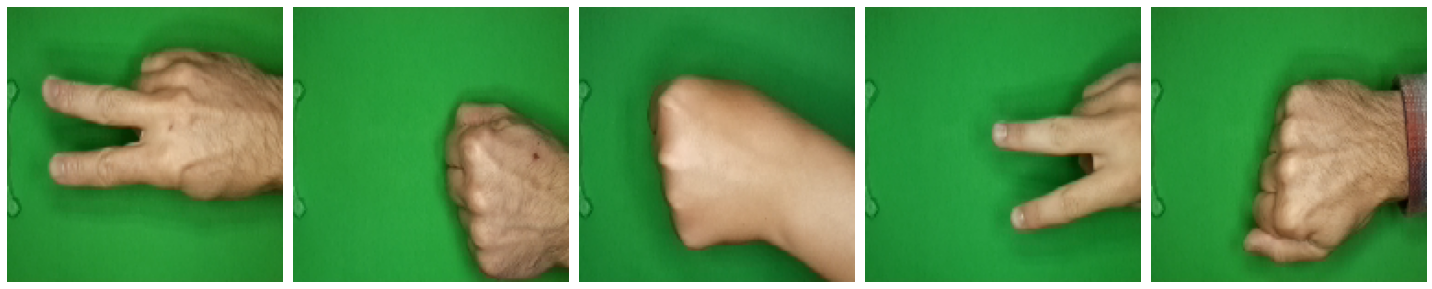

In [20]:
plotImages(sample_training_images[:5])

# Create the model

In [0]:
# define the model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

### Compile the model

In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model summary

In [23]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

### Train the model

In [25]:
# Train the model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=total_validation // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
13/13 [==============================] - 37s 3s/step - loss: 1.9178 - accuracy: 0.3714 - val_loss: 1.0970 - val_accuracy: 0.3438
Epoch 2/15
13/13 [==============================] - 39s 3s/step - loss: 1.0665 - accuracy: 0.4540 - val_loss: 1.0368 - val_accuracy: 0.3880
Epoch 3/15
13/13 [==============================] - 37s 3s/step - loss: 0.8453 - accuracy: 0.6792 - val_loss: 0.7181 - val_accuracy: 0.7682
Epoch 4/15
13/13 [==============================] - 37s 3s/step - loss: 0.5761 - accuracy: 0.8094 - val_loss: 0.6138 - val_accuracy: 0.7760
Epoch 5/15
13/13 [==============================] - 38s 3s/step - loss: 0.4536 - accuracy: 0.8474 - val_loss: 0.4369 - val_accuracy: 0.8672
Epoch 6/15
13/13 [==============================] - 36s 3s/step - loss: 0.3839 - accuracy: 0.8772 - val_loss: 0.4028 - val_accuracy: 0.8750
Epoch 7/15
13/13 [==============================] - 36s 3s/step - loss: 0.3097 - acc

### Visualize training results

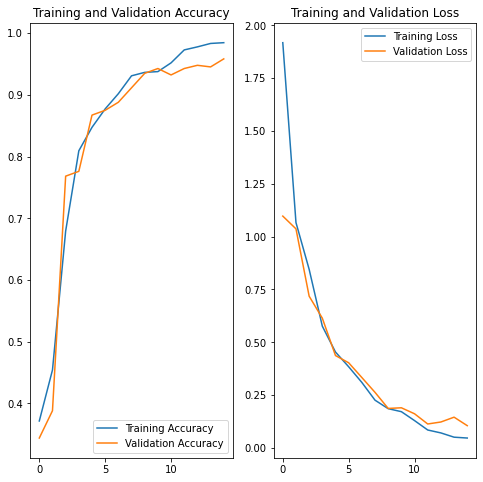

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Test the Sample

In [27]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


Saving test2.png to test2.png
[[0. 0. 1.]]
scissors


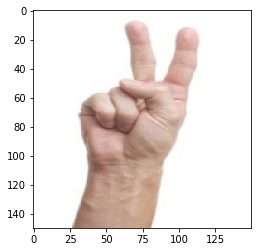

In [29]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  if (classes==[[1., 0., 0.]]).all():
    print('paper')
  elif (classes==[[0., 1., 0.]]).all():
    print('rock')
  elif (classes==[[0., 0., 1.]]).all():
    print('scissors')